In [ ]:
import tensorflow as tf
from tensorflow import keras

# bring in the mnist dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

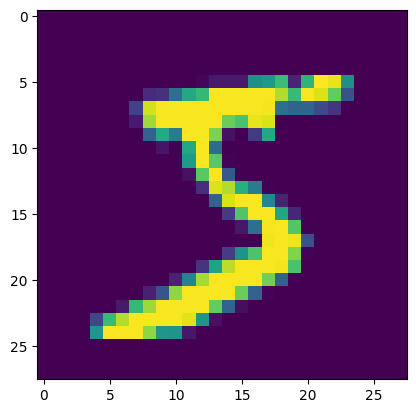

In [ ]:
# plot a single sample
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

In [ ]:
leNet5 = keras.Sequential([
    keras.Input(shape=(32, 32, 1)),
    # rescaling layer to normalize the values to range [0,1]
    keras.layers.Rescaling(scale=1./255),
    # 6 filters that are 5x5 with "valid" padding (none)
    keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='tanh'),
    # downsample the feature maps so they are halved
    keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
    #keras.layers.MaxPooling2D is another pooling option
    # 16 filters
    keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'),
    keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
    # The rest of this is the fully-connected part of the network
    keras.layers.Flatten(),
    # another option instead of just flattening is GlobalAveragePooling2D which will take the avg of each feature map
    #keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(units=120, activation='tanh'),
    keras.layers.Dense(units=84, activation='tanh'),
    keras.layers.Dense(units=10, activation='softmax')
])
leNet5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
leNet5.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 32, 32, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_4                  │ (None, 14, 14, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_5                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 16)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 120)                 │           2,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,626 (61.04 KB)

 Trainable params: 15,626 (61.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np

# pad the images so that they are 32x32 and also normalize them
x_train = np.pad(x_train, ((0, 0), (2, 2), (2, 2)), mode='constant')
x_test = np.pad(x_test, ((0, 0), (2, 2), (2, 2)), mode='constant')
x_train = np.expand_dims(x_train, axis=-1)  # Add channel dimension
x_test = np.expand_dims(x_test, axis=-1)

In [ ]:
x_train.shape

(60000, 32, 32, 1)

In [ ]:
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

In [ ]:
history = leNet5.fit(x_train, y_train, epochs=25, validation_split=0.2, callbacks=callbacks)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5032 - loss: 1.3879 - val_accuracy: 0.9130 - val_loss: 0.2924
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9129 - loss: 0.2841 - val_accuracy: 0.9292 - val_loss: 0.2314
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9365 - loss: 0.2068 - val_accuracy: 0.9402 - val_loss: 0.2018
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9478 - loss: 0.1692 - val_accuracy: 0.9495 - val_loss: 0.1651
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9548 - loss: 0.1485 - val_accuracy: 0.9636 - val_loss: 0.1281
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9609 - loss: 0.1279 - val_accuracy: 0.9596 - val_loss: 0.1432
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9642 - loss: 0.1176 - val_accuracy: 0.9660 - val_loss: 0.1145
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9700 - loss: 0.1023 - 

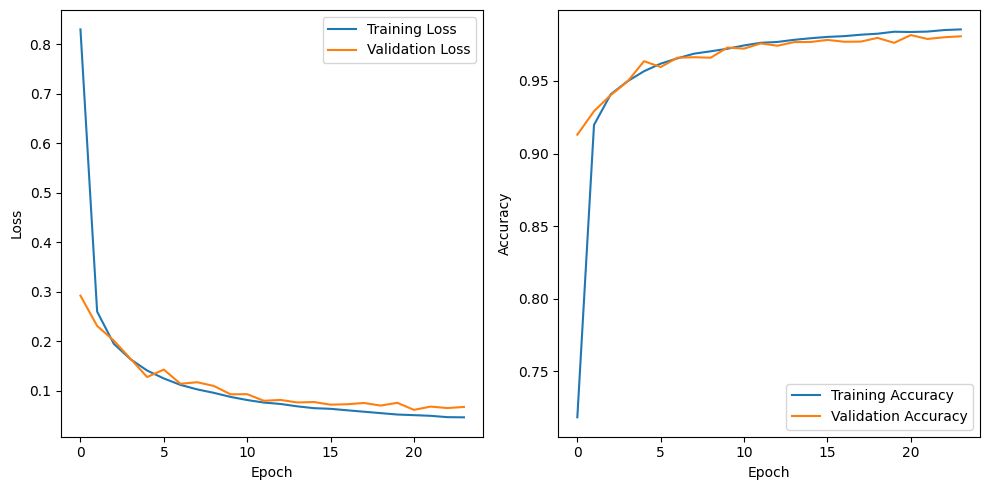

In [ ]:
# prompt: plot the loss and accuracy

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# evaluate the model
test_loss, test_acc = leNet5.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9774 - loss: 0.0710
Test accuracy: 0.9807999730110168
Test loss: 0.061790551990270615
